## Frekvence iz Gradca

<font size=4>Ideja je, da iz frekvenc naredimo histograme oz. pdf, in glede na to izračunamo KL-divergenco. To ponovimo za vse set_ind in za vse frekvence znotraj set_ind. Nato si rezultate zapišemo v datoteko Graz_freq.txt

In [1]:
import numpy as np
from renyi import renyi_divergence_cont, renyi_divergence_hist
from scipy.stats import gaussian_kde as gkde
import matplotlib.pyplot as plt
from optimalBinNumber import optBinNum
from time import time

zacetek = time()

res_ref = np.load('eis_20200226_110006.npz', allow_pickle=1)

res_target = np.load('eis_20200226_150005.npz', allow_pickle=1)

# Zref in ZTarget vsebujejo NAN na zacetku in koncu, zaradi valcne transformacije. Torej naredimo:

KL = {}

for j in range(7):
    
    set_ind = j #index med 0 in 6 ker imamo 7 list

    Zref = res_ref["Z"][set_ind]
    Zref.shape # pove da je navadni numpy array

    Ztarget = res_target["Z"][set_ind]
    Ztarget.shape # pove da je navadni numpy array. Prva dimenzija je enaka kot Zref, druga je lahko delno razlicna
    
    KL["stevilo_freq_{}".format(str(j))] = Zref.shape[0]
    KL["real_hist_{}".format(str(j))] = []
    KL["imag_hist_{}".format(str(j))] = []
    KL["abs_hist_{}".format(str(j))] = []
    KL["real_pdf_{}".format(str(j))] = []
    KL["imag_pdf_{}".format(str(j))] = []
    KL["abs_pdf_{}".format(str(j))] = []
    
    print("set_ind={}".format(str(j)))
    
    for i in range(Zref.shape[0]): #po vseh frekvencah
        sig1 = Zref[i,~np.isnan(Zref[i,:])] # prvi signal za PDF
        sig2 = Ztarget[i,~np.isnan(Ztarget[i,:])] # drugi signal za PDF

        # izkaze se, da je sig1 prazen pri set_ind = 0, zato preverjamo, da elementi so
        if len(sig1) == 0 or len(sig2) == 0:
            if len(sig1) == 0:
                print("    sig1 je prazen pri freq={}, set_ind={}".format(str(i), str(j)))
            if len(sig2) == 0:
                print("    sig2 je prazen pri freq={}, set_ind={}".format(str(i), str(j)))
            KL["real_hist_{}".format(str(j))].append(0)
            KL["imag_hist_{}".format(str(j))].append(0)
            KL["abs_hist_{}".format(str(j))].append(0)
            KL["real_pdf_{}".format(str(j))].append(0)
            KL["imag_pdf_{}".format(str(j))].append(0)
            KL["abs_pdf_{}".format(str(j))].append(0)
            continue

        # najprej KL glede na histograme
        y1,x1 = np.histogram(sig1.real, density=1)
        y2,x2 = np.histogram(sig2.real, density=1)
        KL["real_hist_{}".format(str(j))].append(renyi_divergence_hist(x1,y1,x2,y2,1))

        y1,x1 = np.histogram(sig1.imag, density=1)
        y2,x2 = np.histogram(sig2.imag, density=1)
        KL["imag_hist_{}".format(str(j))].append(renyi_divergence_hist(x1,y1,x2,y2,1))

        y1,x1 = np.histogram(np.abs(sig1), density=1)
        y2,x2 = np.histogram(np.abs(sig2), density=1)
        KL["abs_hist_{}".format(str(j))].append(renyi_divergence_hist(x1,y1,x2,y2,1))

        # ustvarimo pdf-e in izracunamo KL glede na pdf
        pdf1 = gkde(sig1.real)
        pdf2 = gkde(sig2.real)
        # dolocimo minimum in maksimum za primerjavo
        m = min(min(sig1), min(sig2))
        M = max(max(sig1), max(sig2))
        # KL
        KL["real_pdf_{}".format(str(j))].append(renyi_divergence_cont(pdf1, pdf2, 1, m, M))

        #imag
        pdf1 = gkde(sig1.imag)
        pdf2 = gkde(sig2.imag)
        # KL
        KL["imag_pdf_{}".format(str(j))].append(renyi_divergence_cont(pdf1, pdf2, 1, m, M))

        # abs
        pdf1 = gkde(np.abs(sig1))
        pdf2 = gkde(np.abs(sig2))
        # KL
        KL["abs_pdf_{}".format(str(j))].append(renyi_divergence_cont(pdf1, pdf2, 1, m, M)) # alpha = 1 za KL

        print("    {}".format(str(i)))
      # sig1 in sig2 lahko imate razlicno dolzino. Lahko naredis, da vsames dolzino krajsega in daljsega kar odrezes (ni pomembno ali rezes na zacetku ali na koncu)
      # Signala sta complex. Lahko delas KL od np.abs, np.real ali np.imag. Pogledaj kako ti bo kazalo.


                      
with open("Graz_freq.txt", 'w') as dat:
    dat.write(str(KL))


konec = time()


                      
print("porabljen cas: {} sekund".format(str(konec-zacetek)))
#Na koncu bi moral narisati naslednje
# plt.semilogx(res_ref[‘F’],KL) # torej KL naspram frekvence ## tole se ne da splotat, razlicne dimenzije: 233 proti 39

set_ind=0
    sig1 je prazen pri freq=0, set_ind=0
    sig1 je prazen pri freq=1, set_ind=0
    sig1 je prazen pri freq=2, set_ind=0
    sig1 je prazen pri freq=3, set_ind=0
    sig1 je prazen pri freq=4, set_ind=0
    sig1 je prazen pri freq=5, set_ind=0
    sig1 je prazen pri freq=6, set_ind=0
    sig1 je prazen pri freq=7, set_ind=0
    sig1 je prazen pri freq=8, set_ind=0
    sig1 je prazen pri freq=9, set_ind=0
    sig1 je prazen pri freq=10, set_ind=0
    sig1 je prazen pri freq=11, set_ind=0
    sig1 je prazen pri freq=12, set_ind=0
    sig1 je prazen pri freq=13, set_ind=0
    sig1 je prazen pri freq=14, set_ind=0
    sig1 je prazen pri freq=15, set_ind=0
    sig1 je prazen pri freq=16, set_ind=0
    sig1 je prazen pri freq=17, set_ind=0
    sig1 je prazen pri freq=18, set_ind=0
    sig1 je prazen pri freq=19, set_ind=0
    sig1 je prazen pri freq=20, set_ind=0
    sig1 je prazen pri freq=21, set_ind=0
    sig1 je prazen pri freq=22, set_ind=0
    sig1 je prazen pri freq=23, se

/Users/aljazostrez/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:448: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


    27
    28
    29
    30
    31
    32
    33
    34
    35
    36
    37
    38
set_ind=1
    0
    1


/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:56: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(KL_integrand, minimum, maximum)[0]


    2
    3
    4
    5
    6
    7
    8
    9
    10
    11
    12
    13
    14
    15
    16
    17
    18
    19
    20
    21
    22
    23
    24
    25
    26
    27
    28
    29
    30
    31
    32
    33
    34
    35
    36
    37
    38
set_ind=2
    0
    1
    2
    3
    4
    5
    6
    7
    8
    9
    10
    11
    12
    13
    14
    15
    16
    17
    18
    19
    20
    21
    22
    23
    24
    25
    26
    27
    28
    29
    30
    31


/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:56: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(KL_integrand, minimum, maximum)[0]


    32
    33
    34
    35
    36
    37
    38
set_ind=3
    0
    1
    2
    3
    4
    5
    6
    7
    8
    9
    10
    11
    12
    13
    14
    15
    16
    17
    18
    19
    20
    21
    22
    23
    24
    25
    26
    27
    28
    29
    30
    31
    32
    33
    34
    35
    36
    37
    38
set_ind=4
    0
    1
    2
    3
    4
    5
    6
    7
    8
    9
    10
    11
    12
    13
    14
    15
    16
    17
    18
    19
    20
    21
    22
    23
    24
    25
    26
    27
    28
    29
set_ind=5
    0
    1
    2
    3
    4
    5
    6
    7
    8
    9
    10
    11
    12
    13
    14
    15
    16
    17
    18
    19
    20
    21
    22
    23
    24
    25
    26
    27
    28
    29
    30
    31
    32
    33
    34
    35
    36
    37
    38
set_ind=6
    0
    1
    2
    3
    4
    5
    6
    7
porabljen cas: 135059.3955771923 sekund


<font size=4>Ker smo rezultate shranili v datoteko, zgornje kode ne rabimo več znova zaganjati. Uvozimo naše rezultate iz Graz_freq.txt.

In [2]:
import ast

with open("Graz_freq.txt", 'r') as dat:
    KL = ast.literal_eval(dat.readline())
    

<font size=4>Za pregled poglejmo ključe v slovarju KL.

In [13]:
print(KL_1.keys())


dict_keys(['stevilo_freq_0', 'real_hist_0', 'imag_hist_0', 'abs_hist_0', 'real_pdf_0', 'imag_pdf_0', 'abs_pdf_0', 'stevilo_freq_1', 'real_hist_1', 'imag_hist_1', 'abs_hist_1', 'real_pdf_1', 'imag_pdf_1', 'abs_pdf_1', 'stevilo_freq_2', 'real_hist_2', 'imag_hist_2', 'abs_hist_2', 'real_pdf_2', 'imag_pdf_2', 'abs_pdf_2', 'stevilo_freq_3', 'real_hist_3', 'imag_hist_3', 'abs_hist_3', 'real_pdf_3', 'imag_pdf_3', 'abs_pdf_3', 'stevilo_freq_4', 'real_hist_4', 'imag_hist_4', 'abs_hist_4', 'real_pdf_4', 'imag_pdf_4', 'abs_pdf_4', 'stevilo_freq_5', 'real_hist_5', 'imag_hist_5', 'abs_hist_5', 'real_pdf_5', 'imag_pdf_5', 'abs_pdf_5', 'stevilo_freq_6', 'real_hist_6', 'imag_hist_6', 'abs_hist_6', 'real_pdf_6', 'imag_pdf_6', 'abs_pdf_6'])


<font size=4>Napišimo funkcijo, s katero bomo prikazali razultate in funkcijo, s katero lahko pogledamo histogram oz. pdf poljubnega signala.

In [1]:
import matplotlib.pyplot as plt
from optimalBinNumber import optBinNum
from scipy.stats import gaussian_kde as gkde
import numpy as np

def prikaz_KL(metoda1, metoda2, set_ind):
    # metoda1: nacin, kako iz kompleksnih dobimo realna števila. Možnosti: "real", "imag", "abs"
    # metoda2: glede na kaj računamo KL: histogram ali pdf - možnosti: "hist", "pdf"
    # set_ind: 0,...,6
    if (metoda1 not in ["real", "imag", "abs"]) or (metoda2 not in ["hist", "pdf"]):
        return "V slovarju ni take metode."
    if set_ind not in list(range(7)):
        return "set_ind ni v pravem območju."
    set_ind = str(set_ind)
    key1 = "stevilo_freq_{}".format(set_ind)
    x = range(KL[key1])
    key2 = "{}_{}_{}".format(metoda1, metoda2, set_ind)
    y = KL[key2]
    plt.title("KL divergenca set_ind = {}, glede na {} in {}".format(set_ind, metoda1, metoda2))
    plt.plot(x,y)
    plt.xlabel("Zaporedna frekvenca")
    plt.ylabel("KL divergenca")
    plt.show()

def prikaz_hist(set_ind, freq, metoda):
    # set_ind: 0,...,6
    # freq: zaporedna frekvenca
    # metoda: "real", "imag", "abs"
    res_ref = np.load('eis_20200226_110006.npz', allow_pickle=1)
    res_target = np.load('eis_20200226_150005.npz', allow_pickle=1)
    
    Zref = res_ref["Z"][set_ind]
    Ztarget = res_target["Z"][set_ind]
    
    if freq not in list(range(Zref.shape[0])):
        return "Popravi frekvenco."
    
    sig1 = Zref[freq,~np.isnan(Zref[freq,:])] # prvi signal
    sig2 = Ztarget[freq,~np.isnan(Ztarget[freq,:])] # drugi signal
    
    if len(sig1) == 0 or len(sig2) == 0:
        return "V enem od signalov ni nobenega podatka."
    
    if metoda == "real":
        sig1 = sig1.real
        sig2 = sig2.real
    elif metoda == "imag":
        sig1 = sig1.imag
        sig2 = sig2.imag
    elif metoda == "abs":
        sig1 = np.abs(sig1)
        sig2 = np.abs(sig2)
    else:
        return "Nimam rezultatov za to metodo."
    
    if len(sig1) > 20000:
        stran = round(len(sig1)/100) # nekaj jih damo stran, da bo slika pregledna
    else:
        stran = 10
    minimum = min(min(sorted(sig1)[stran:]), min(sorted(sig2)[stran:]))
    maximum = max(max(sorted(sig1)[:-stran]), max(sorted(sig2)[:-stran]))
    
    plt.figure(figsize=(15,8))
    
    ax1 = plt.subplot(121)
    plt.title("Histogram set_ind = {}, freq = {}, ref".format(str(set_ind), str(freq)))
    plt.hist(sig1, bins=optBinNum(sig1), density=1)
    plt.xlabel("sig_{}".format(metoda))
    plt.xlim(minimum, maximum)
    
    plt.subplot(122, sharex=ax1, sharey=ax1)
    plt.title("Histogram set_ind = {}, freq = {}, target".format(str(set_ind), str(freq)))
    plt.hist(sig2, bins=optBinNum(sig2), density=1)
    plt.xlabel("sig_{}".format(metoda))
    
    plt.show()
    
def prikaz_pdf(set_ind, freq, metoda):
    # set_ind: 0,...,6
    # freq: zaporedna frekvenca
    # metoda: "real", "imag", "abs"
    res_ref = np.load('eis_20200226_110006.npz', allow_pickle=1)
    res_target = np.load('eis_20200226_150005.npz', allow_pickle=1)
    
    Zref = res_ref["Z"][set_ind]
    Ztarget = res_target["Z"][set_ind]
    
    if freq not in list(range(Zref.shape[0])):
        return "Popravi frekvenco."
    
    sig1 = Zref[freq,~np.isnan(Zref[freq,:])] # prvi signal
    sig2 = Ztarget[freq,~np.isnan(Ztarget[freq,:])] # drugi signal
    
    if len(sig1) == 0 or len(sig2) == 0:
        return "V enem od signalov ni nobenega podatka."
    
    if metoda == "real":
        sig1 = sig1.real
        sig2 = sig2.real
    elif metoda == "imag":
        sig1 = sig1.imag
        sig2 = sig2.imag
    elif metoda == "abs":
        sig1 = np.abs(sig1)
        sig2 = np.abs(sig2)
    else:
        return "Nimam rezultatov za to metodo."
    
    if len(sig1) > 20000:
        stran = round(len(sig1)/100) # nekaj jih damo stran, da bo slika pregledna
    else:
        stran = 10
        
    minimum = min(min(sorted(sig1)[stran:]), min(sorted(sig2)[stran:]))
    maximum = max(max(sorted(sig1)[:-stran]), max(sorted(sig2)[:-stran]))
    
    pdf1 = gkde(sig1)
    pdf2 = gkde(sig2)
    x = np.linspace(minimum, maximum, 1000)
    plt.title("Pdf ref in target, set_ind = {}, freq = {}".format(str(set_ind), str(freq)))
    plt.plot(x, pdf1(x), label="pdf_sig1")
    plt.plot(x, pdf2(x), label="pdf_sig2")
    plt.legend()
    plt.xlabel("sig_{}".format(metoda))
    plt.show()
    


<font size=4>

Torej, s funkcijo prikaz_KL lahko dostopamo do grafa, ki nam prikaže KL divergenco glede na frekvence iz set_ind in glede na metodi (pdf/hist, real/imag/abs).

<br>
<br>

S funkcijama prikaz_hist oz. prikaz_pdf lahko pogledamo porazdelitvi frekvenc freq v set_ind glede na metodo (real/imag/abs).

<br>
<br>

Spodaj najprej izrišimo vse možne prikaz_KL (21 grafov). Nato si poglejmo še primer, kako izrišemo pdf ali histograme.

<font size=4/>

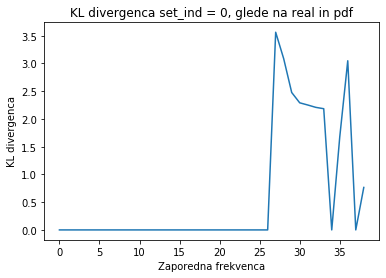

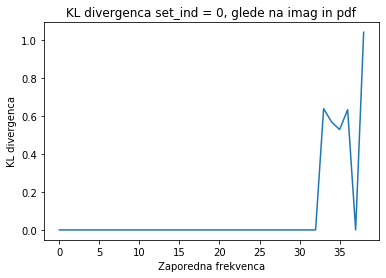

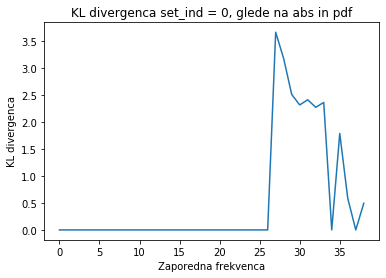

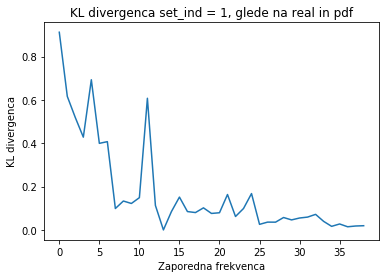

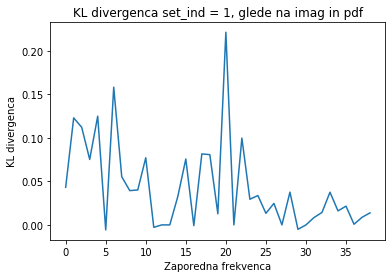

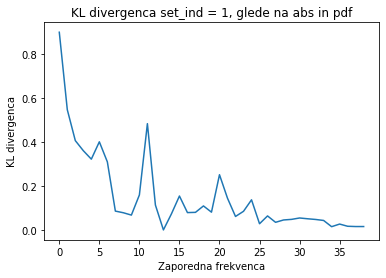

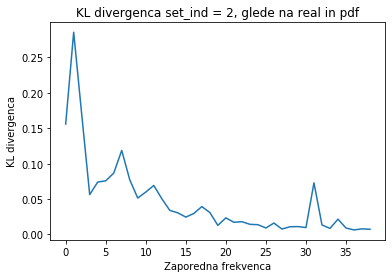

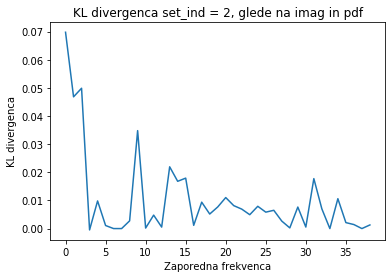

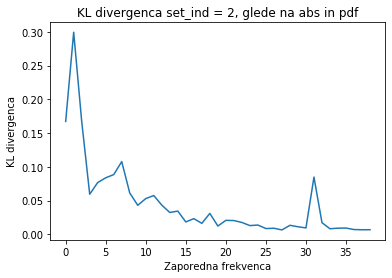

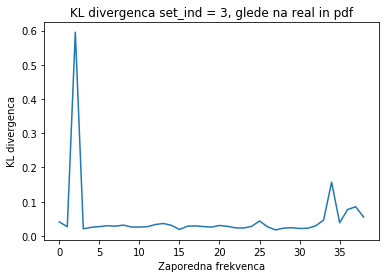

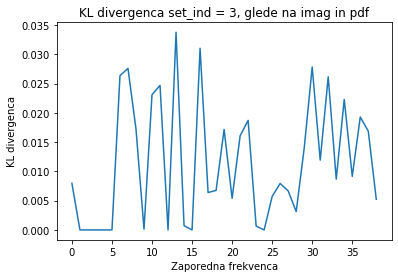

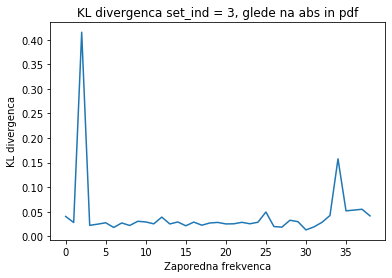

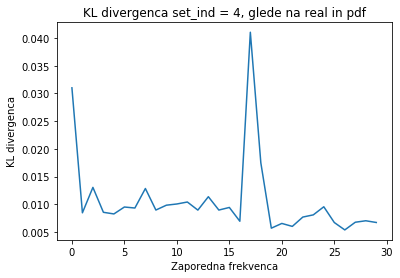

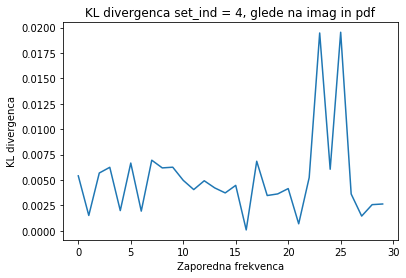

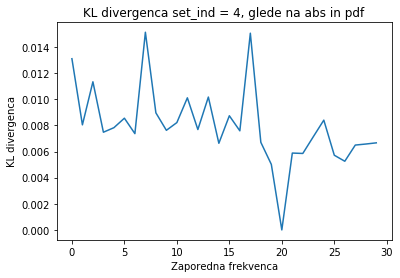

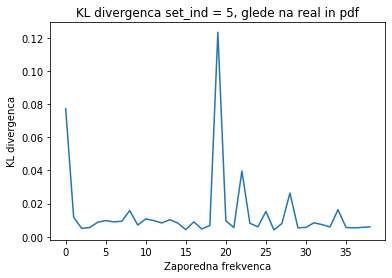

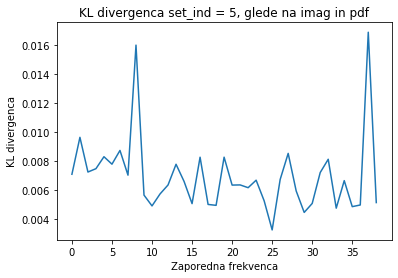

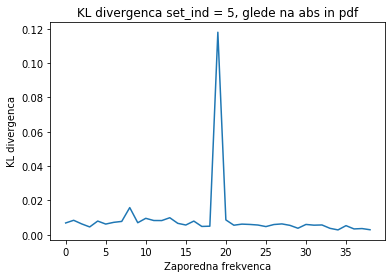

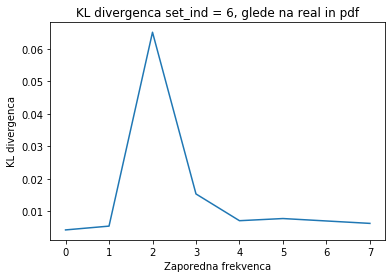

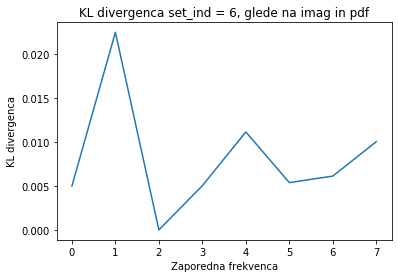

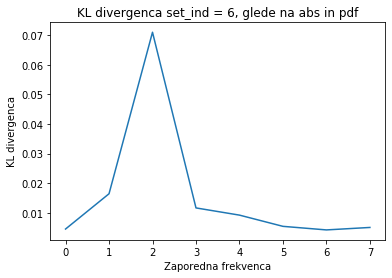

In [19]:
for i in range(7):
    prikaz_KL("real", "pdf", i)
    prikaz_KL("imag", "pdf", i)
    prikaz_KL("abs", "pdf", i)



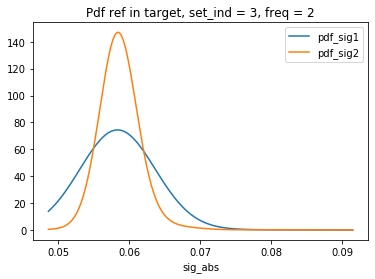

In [72]:
set_ind = 3
freq = 2
metoda = "abs"
prikaz_pdf(set_ind,freq,metoda)

48732


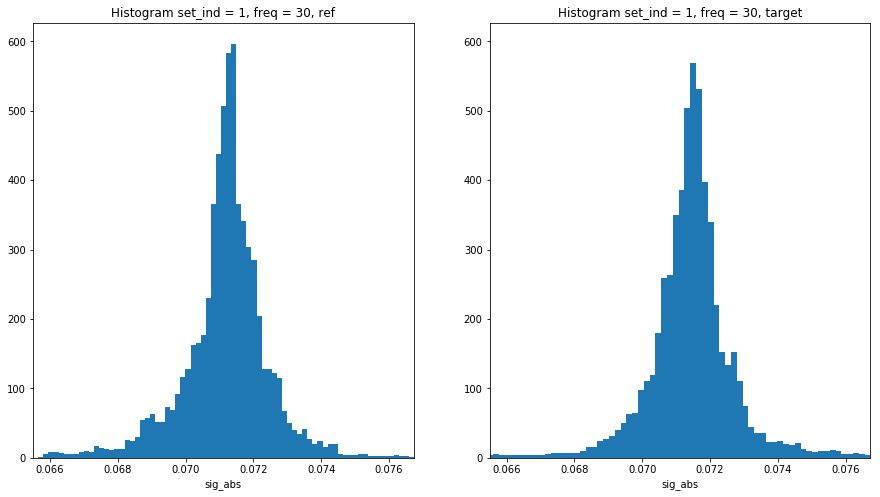

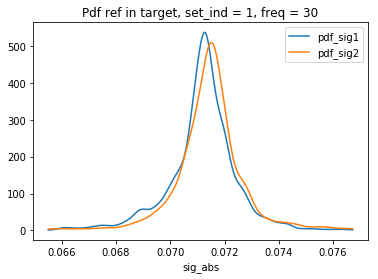

In [3]:
set_ind = 1
freq = 30
metoda = "abs"
prikaz_hist(set_ind,freq,metoda)
prikaz_pdf(set_ind, freq, metoda)
